In [1]:
from tkinter import messagebox
!pip install yellowbrick
#Import the necesary libraries
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import messagebox
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import cosine_similarity
import warnings
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
import dotenv
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")




data = pd.read_csv(r"C:\Users\basil\OneDrive\Escritorio\Ironhack\labs\DB-recomender.csv")
data

,song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Don't Change,INXS,0.206,0.810,9,-6.492,1,0.0423,0.000059,0.064400,0.0855,0.155,163.552,audio_features,2j7z87EnqB1NFQts2db0VR,spotify:track:2j7z87EnqB1NFQts2db0VR,https://api.spotify.com/v1/tracks/2j7z87EnqB1N...,https://api.spotify.com/v1/audio-analysis/2j7z...,268200,4
1,Halo,Beyoncé,0.508,0.720,11,-5.908,0,0.0628,0.272000,0.000000,0.0563,0.472,79.983,audio_features,4JehYebiI9JE8sR8MisGVb,spotify:track:4JehYebiI9JE8sR8MisGVb,https://api.spotify.com/v1/tracks/4JehYebiI9JE...,https://api.spotify.com/v1/audio-analysis/4Jeh...,261640,4
2,It's My Life,Bon Jovi,0.551,0.913,0,-4.063,0,0.0466,0.026300,0.000013,0.3470,0.544,119.992,audio_features,0v1XpBHnsbkCn7iJ9Ucr1l,spotify:track:0v1XpBHnsbkCn7iJ9Ucr1l,https://api.spotify.com/v1/tracks/0v1XpBHnsbkC...,https://api.spotify.com/v1/audio-analysis/0v1X...,224493,4
3,Where Did Our Love Go,The Supremes,0.566,0.490,0,-10.867,1,0.0414,0.791000,0.000014,0.0919,0.847,134.934,audio_features,69RH84na5iUNwrwxpgjC5j,spotify:track:69RH84na5iUNwrwxpgjC5j,https://api.spotify.com/v1/tracks/69RH84na5iUN...,https://api.spotify.com/v1/audio-analysis/69RH...,153333,4
4,Ordinary World,Duran Duran,0.472,0.652,1,-10.171,0,0.0305,0.013100,0.000011,0.1400,0.401,140.124,audio_features,0wokCRaKD0zPNhMRXAgVsr,spotify:track:0wokCRaKD0zPNhMRXAgVsr,https://api.spotify.com/v1/tracks/0wokCRaKD0zP...,https://api.spotify.com/v1/audio-analysis/0wok...,340200,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,Work It,Missy Elliott,0.884,0.677,1,-5.603,1,0.2830,0.077800,0.000000,0.0732,0.584,101.868,audio_features,3jagJCUbdqhDSPuxP8cAqF,spotify:track:3jagJCUbdqhDSPuxP8cAqF,https://api.spotify.com/v1/tracks/3jagJCUbdqhD...,https://api.spotify.com/v1/audio-analysis/3jag...,263227,4
1008,Anti-Hero,Taylor Swift,0.637,0.643,4,-6.571,1,0.0519,0.130000,0.000002,0.1420,0.533,97.008,audio_features,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,https://api.spotify.com/v1/audio-analysis/0V3w...,200690,4
1009,Never Gonna Not Dance Again,P!nk,0.668,0.802,5,-4.005,0,0.0917,0.027300,0.000000,0.1630,0.769,113.796,audio_features,6sZo5nJIsFWXefRCCexpx0,spotify:track:6sZo5nJIsFWXefRCCexpx0,https://api.spotify.com/v1/tracks/6sZo5nJIsFWX...,https://api.spotify.com/v1/audio-analysis/6sZo...,225789,4
1010,TRUSTFALL,P!nk,0.636,0.888,8,-3.889,1,0.0945,0.001620,0.000216,0.1470,0.250,122.032,audio_features,4FWbsd91QSvgr1dSWwW51e,spotify:track:4FWbsd91QSvgr1dSWwW51e,https://api.spotify.com/v1/tracks/4FWbsd91QSvg...,https://api.spotify.com/v1/audio-analysis/4FWb...,237200,4


In [2]:
# Verifica si hay duplicados basados en todas las columnas
duplicados = data[data.duplicated()]

# Verifica si hay duplicados basados en columnas específicas, por ejemplo, título y artista
duplicados_especificos = data[data.duplicated(['song', 'artist'])]

# Muestra los registros duplicados
print(duplicados)

                                                song           artist  \
618  My Heart Will Go On - Love Theme from "Titanic"      Céline Dion   
685                         I'm Gonna Be (500 Miles)  The Proclaimers   
867                                       The Reflex      Duran Duran   
875                                        Jailbreak            AC/DC   
914               Somebody To Love - Remastered 2011            Queen   
944                                      Sex on Fire    Kings of Leon   
971                                April Sun in Cuba           Dragon   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
618         0.428   0.276    4   -11.729     1       0.0312       0.73200   
685         0.851   0.551    4    -5.177     1       0.0396       0.15100   
867         0.556   0.900    0    -6.110     1       0.0970       0.12300   
875         0.572   0.835    9    -5.552     1       0.0790       0.00953   
914         0.406   0.698    8

In [3]:
# Elimina los duplicados basados en título y artista
data.drop_duplicates(subset=['song', 'artist'], inplace=True)

# Muestra el DataFrame sin duplicados
print(data)

                             song         artist  danceability  energy  key  \
0                    Don't Change           INXS         0.206   0.810    9   
1                            Halo        Beyoncé         0.508   0.720   11   
2                    It's My Life       Bon Jovi         0.551   0.913    0   
3           Where Did Our Love Go   The Supremes         0.566   0.490    0   
4                  Ordinary World    Duran Duran         0.472   0.652    1   
...                           ...            ...           ...     ...  ...   
1007                      Work It  Missy Elliott         0.884   0.677    1   
1008                    Anti-Hero   Taylor Swift         0.637   0.643    4   
1009  Never Gonna Not Dance Again           P!nk         0.668   0.802    5   
1010                    TRUSTFALL           P!nk         0.636   0.888    8   
1011                      My Hero   Foo Fighters         0.398   0.927    9   

      loudness  mode  speechiness  acousticness  in

In [4]:
data

,song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Don't Change,INXS,0.206,0.810,9,-6.492,1,0.0423,0.000059,0.064400,0.0855,0.155,163.552,audio_features,2j7z87EnqB1NFQts2db0VR,spotify:track:2j7z87EnqB1NFQts2db0VR,https://api.spotify.com/v1/tracks/2j7z87EnqB1N...,https://api.spotify.com/v1/audio-analysis/2j7z...,268200,4
1,Halo,Beyoncé,0.508,0.720,11,-5.908,0,0.0628,0.272000,0.000000,0.0563,0.472,79.983,audio_features,4JehYebiI9JE8sR8MisGVb,spotify:track:4JehYebiI9JE8sR8MisGVb,https://api.spotify.com/v1/tracks/4JehYebiI9JE...,https://api.spotify.com/v1/audio-analysis/4Jeh...,261640,4
2,It's My Life,Bon Jovi,0.551,0.913,0,-4.063,0,0.0466,0.026300,0.000013,0.3470,0.544,119.992,audio_features,0v1XpBHnsbkCn7iJ9Ucr1l,spotify:track:0v1XpBHnsbkCn7iJ9Ucr1l,https://api.spotify.com/v1/tracks/0v1XpBHnsbkC...,https://api.spotify.com/v1/audio-analysis/0v1X...,224493,4
3,Where Did Our Love Go,The Supremes,0.566,0.490,0,-10.867,1,0.0414,0.791000,0.000014,0.0919,0.847,134.934,audio_features,69RH84na5iUNwrwxpgjC5j,spotify:track:69RH84na5iUNwrwxpgjC5j,https://api.spotify.com/v1/tracks/69RH84na5iUN...,https://api.spotify.com/v1/audio-analysis/69RH...,153333,4
4,Ordinary World,Duran Duran,0.472,0.652,1,-10.171,0,0.0305,0.013100,0.000011,0.1400,0.401,140.124,audio_features,0wokCRaKD0zPNhMRXAgVsr,spotify:track:0wokCRaKD0zPNhMRXAgVsr,https://api.spotify.com/v1/tracks/0wokCRaKD0zP...,https://api.spotify.com/v1/audio-analysis/0wok...,340200,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,Work It,Missy Elliott,0.884,0.677,1,-5.603,1,0.2830,0.077800,0.000000,0.0732,0.584,101.868,audio_features,3jagJCUbdqhDSPuxP8cAqF,spotify:track:3jagJCUbdqhDSPuxP8cAqF,https://api.spotify.com/v1/tracks/3jagJCUbdqhD...,https://api.spotify.com/v1/audio-analysis/3jag...,263227,4
1008,Anti-Hero,Taylor Swift,0.637,0.643,4,-6.571,1,0.0519,0.130000,0.000002,0.1420,0.533,97.008,audio_features,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,https://api.spotify.com/v1/audio-analysis/0V3w...,200690,4
1009,Never Gonna Not Dance Again,P!nk,0.668,0.802,5,-4.005,0,0.0917,0.027300,0.000000,0.1630,0.769,113.796,audio_features,6sZo5nJIsFWXefRCCexpx0,spotify:track:6sZo5nJIsFWXefRCCexpx0,https://api.spotify.com/v1/tracks/6sZo5nJIsFWX...,https://api.spotify.com/v1/audio-analysis/6sZo...,225789,4
1010,TRUSTFALL,P!nk,0.636,0.888,8,-3.889,1,0.0945,0.001620,0.000216,0.1470,0.250,122.032,audio_features,4FWbsd91QSvgr1dSWwW51e,spotify:track:4FWbsd91QSvgr1dSWwW51e,https://api.spotify.com/v1/tracks/4FWbsd91QSvg...,https://api.spotify.com/v1/audio-analysis/4FWb...,237200,4


In [5]:
# Selecciona solo las columnas numéricas para escalar
numeric_columns = data.select_dtypes(include=['int', 'float']).columns

# Escala los datos
scaler = StandardScaler()
X_prep = scaler.fit_transform(data[numeric_columns])


In [6]:
# Crea una instancia de KMeans
kmeans = KMeans(n_clusters=4, random_state=42)

# Ajusta el modelo KMeans a los datos escalados
kmeans.fit(X_prep)

KMeans(n_clusters=4, random_state=42)

In [7]:
# predecir |  asignar clusters:
clusters = kmeans.predict(X_prep)
clusters

array([3, 2, 2, ..., 2, 3, 3])

In [8]:
# ver el tamaño de los clusters
pd.Series(clusters).value_counts().sort_index()

0    215
1     45
2    210
3    534
Name: count, dtype: int64

In [9]:
# Explore the cluster assignment in the original dataset
X_df = data
X_df["cluster"] = clusters
X_df.head()

X_df['cluster'] = X_df['cluster'].apply(lambda x: 0 if x == 1 else 1 if x == 2 else 2)
X_df

,song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,Don't Change,INXS,0.206,0.810,9,-6.492,1,0.0423,0.000059,0.064400,...,0.155,163.552,audio_features,2j7z87EnqB1NFQts2db0VR,spotify:track:2j7z87EnqB1NFQts2db0VR,https://api.spotify.com/v1/tracks/2j7z87EnqB1N...,https://api.spotify.com/v1/audio-analysis/2j7z...,268200,4,2
1,Halo,Beyoncé,0.508,0.720,11,-5.908,0,0.0628,0.272000,0.000000,...,0.472,79.983,audio_features,4JehYebiI9JE8sR8MisGVb,spotify:track:4JehYebiI9JE8sR8MisGVb,https://api.spotify.com/v1/tracks/4JehYebiI9JE...,https://api.spotify.com/v1/audio-analysis/4Jeh...,261640,4,1
2,It's My Life,Bon Jovi,0.551,0.913,0,-4.063,0,0.0466,0.026300,0.000013,...,0.544,119.992,audio_features,0v1XpBHnsbkCn7iJ9Ucr1l,spotify:track:0v1XpBHnsbkCn7iJ9Ucr1l,https://api.spotify.com/v1/tracks/0v1XpBHnsbkC...,https://api.spotify.com/v1/audio-analysis/0v1X...,224493,4,1
3,Where Did Our Love Go,The Supremes,0.566,0.490,0,-10.867,1,0.0414,0.791000,0.000014,...,0.847,134.934,audio_features,69RH84na5iUNwrwxpgjC5j,spotify:track:69RH84na5iUNwrwxpgjC5j,https://api.spotify.com/v1/tracks/69RH84na5iUN...,https://api.spotify.com/v1/audio-analysis/69RH...,153333,4,2
4,Ordinary World,Duran Duran,0.472,0.652,1,-10.171,0,0.0305,0.013100,0.000011,...,0.401,140.124,audio_features,0wokCRaKD0zPNhMRXAgVsr,spotify:track:0wokCRaKD0zPNhMRXAgVsr,https://api.spotify.com/v1/tracks/0wokCRaKD0zP...,https://api.spotify.com/v1/audio-analysis/0wok...,340200,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,Work It,Missy Elliott,0.884,0.677,1,-5.603,1,0.2830,0.077800,0.000000,...,0.584,101.868,audio_features,3jagJCUbdqhDSPuxP8cAqF,spotify:track:3jagJCUbdqhDSPuxP8cAqF,https://api.spotify.com/v1/tracks/3jagJCUbdqhD...,https://api.spotify.com/v1/audio-analysis/3jag...,263227,4,2
1008,Anti-Hero,Taylor Swift,0.637,0.643,4,-6.571,1,0.0519,0.130000,0.000002,...,0.533,97.008,audio_features,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,https://api.spotify.com/v1/audio-analysis/0V3w...,200690,4,2
1009,Never Gonna Not Dance Again,P!nk,0.668,0.802,5,-4.005,0,0.0917,0.027300,0.000000,...,0.769,113.796,audio_features,6sZo5nJIsFWXefRCCexpx0,spotify:track:6sZo5nJIsFWXefRCCexpx0,https://api.spotify.com/v1/tracks/6sZo5nJIsFWX...,https://api.spotify.com/v1/audio-analysis/6sZo...,225789,4,1
1010,TRUSTFALL,P!nk,0.636,0.888,8,-3.889,1,0.0945,0.001620,0.000216,...,0.250,122.032,audio_features,4FWbsd91QSvgr1dSWwW51e,spotify:track:4FWbsd91QSvgr1dSWwW51e,https://api.spotify.com/v1/tracks/4FWbsd91QSvg...,https://api.spotify.com/v1/audio-analysis/4FWb...,237200,4,2


In [10]:
kmeans.inertia_

9936.077857757835

In [11]:
import numpy as np

K = range(2, 20)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

inertia

[11541.77081282437,
 10691.588217836326,
 9932.53246338455,
 9289.23036750361,
 8673.641290230995,
 8171.782077701431,
 7647.303046196896,
 7307.05100999624,
 7039.525478491572,
 6800.305470884321,
 6574.087531834393,
 6402.467161103688,
 6249.832342208645,
 6143.671968223141,
 6018.500050438059,
 5910.034569569563,
 5858.1244589118105,
 5729.406648496725]

In [12]:
# "performance metric"
kmeans.inertia_

5729.406648496725

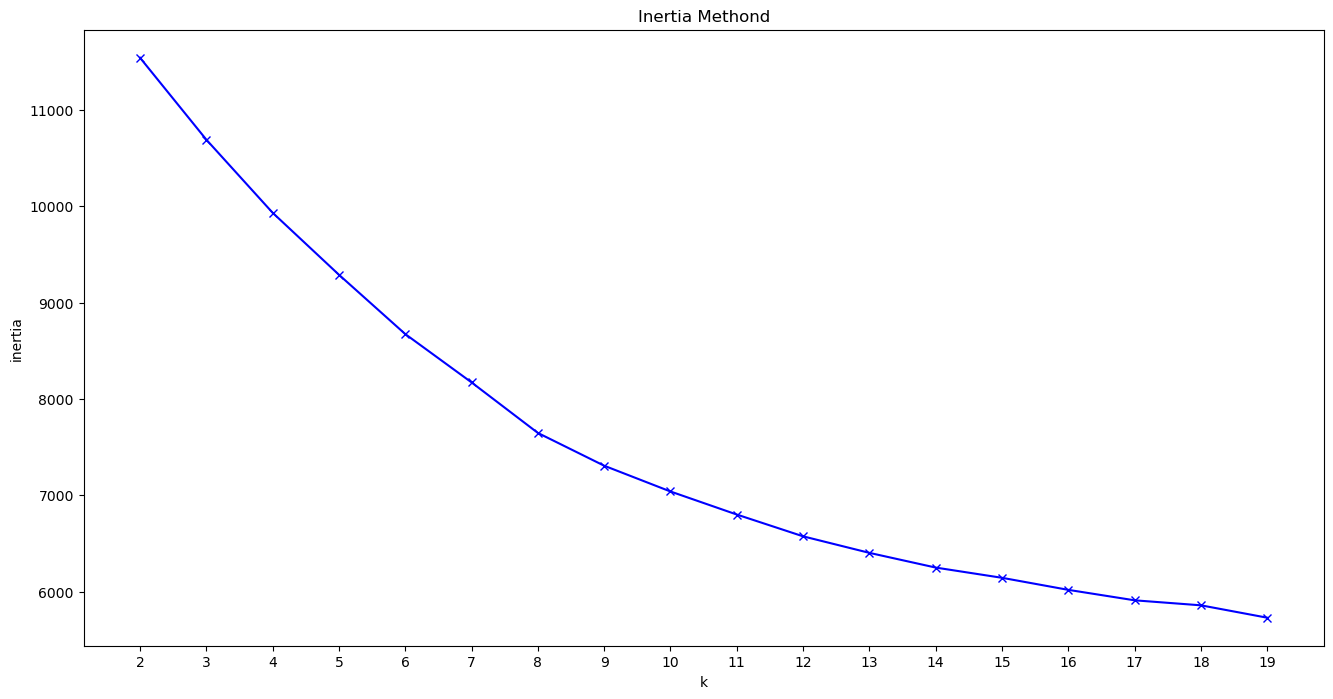

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.title('Inertia Methond')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

In [14]:
#Checking the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_prep)
    wcss.append(kmeans.inertia_)

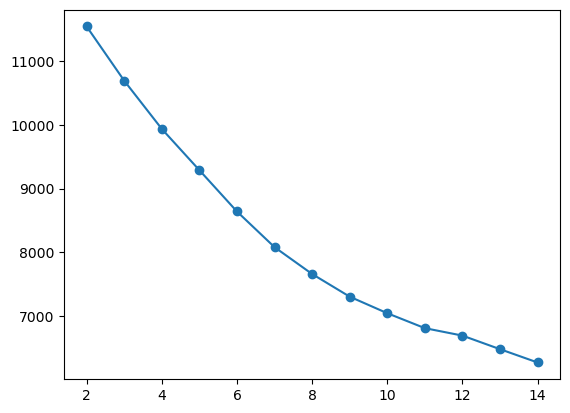

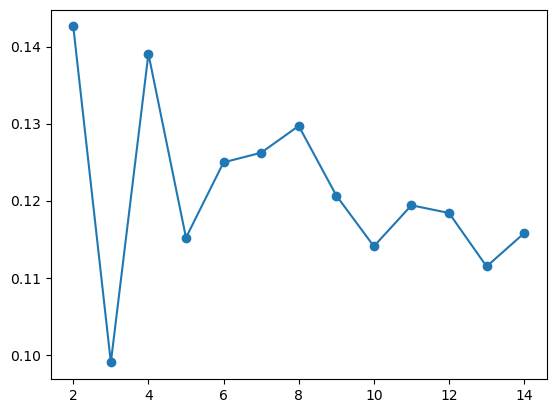

In [15]:
inertia = []
silhouette_scores = []
ranges = range(2,15)

for k in ranges:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_prep)
    inertia.append(kmeans.inertia_)

    silhouette_avg = silhouette_score(X_prep, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.plot(ranges,inertia, marker = "o")
plt.show()

plt.plot(ranges, silhouette_scores, marker="o")

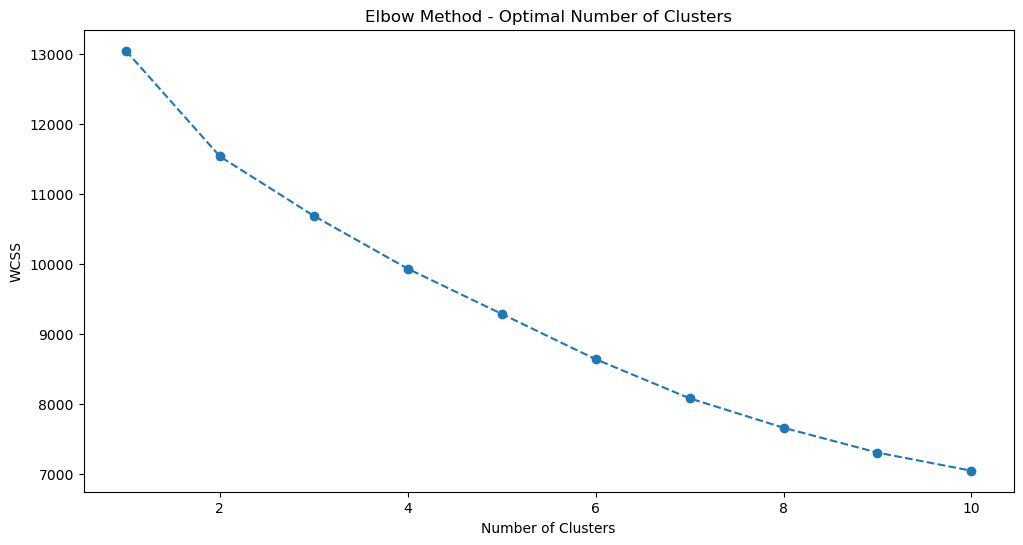

In [16]:
plt.figure(figsize=(12,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.show()

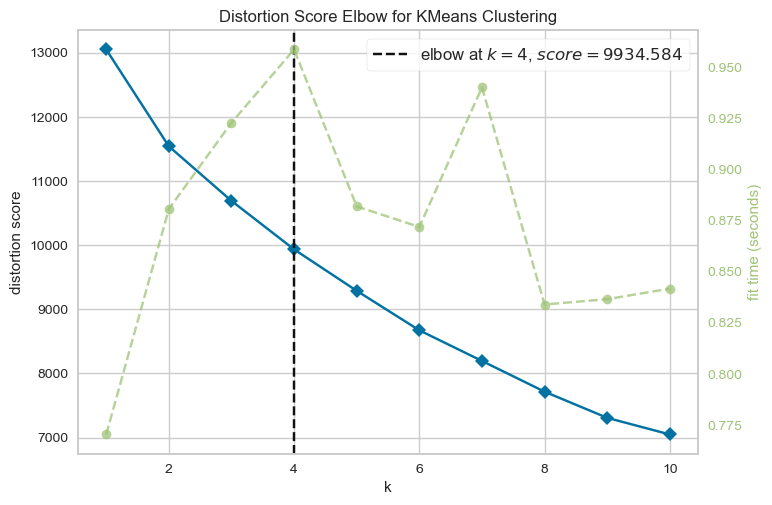

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Assuming you have already defined and scaled your 'cluster_data', if not, make sure you do that.

model = KMeans(n_clusters=3)  # You can change the number of clusters as needed
visualizer = KElbowVisualizer(model, k=(1,11))
visualizer.fit(X_prep)
visualizer.show()

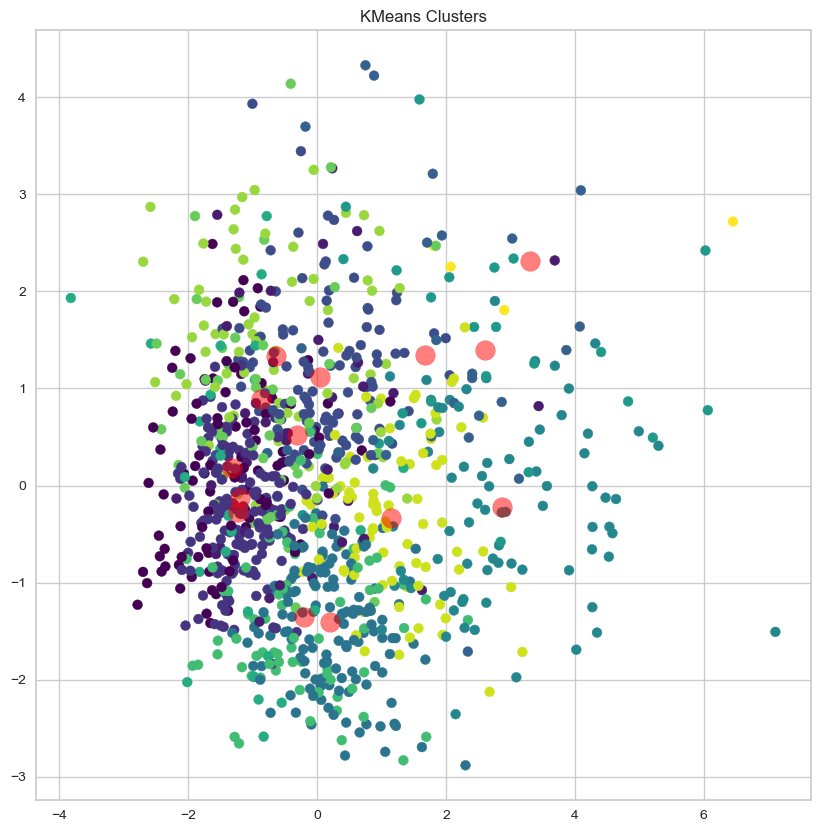

In [18]:
#Plotting the clusters and its centroids
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_prep)
pca_centers = pca.transform(kmeans.cluster_centers_)
plt.figure(figsize=(10, 10))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans Clusters')
plt.show()

In [19]:
#Trying to cluster the data using DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan.fit(X_prep)
data['cluster_dbscan'] = dbscan.labels_

data['cluster_dbscan'].value_counts()

cluster_dbscan
-1    1002
 0       2
Name: count, dtype: int64

In [20]:
#Trying to cluster the data using Gaussian Mixture
gmm = GaussianMixture(n_components=5)
gmm.fit(X_prep)
data['cluster_gmm'] = gmm.predict(X_prep)

data['cluster_gmm'].value_counts()

cluster_gmm
3    642
1    301
2     30
4     27
0      4
Name: count, dtype: int64

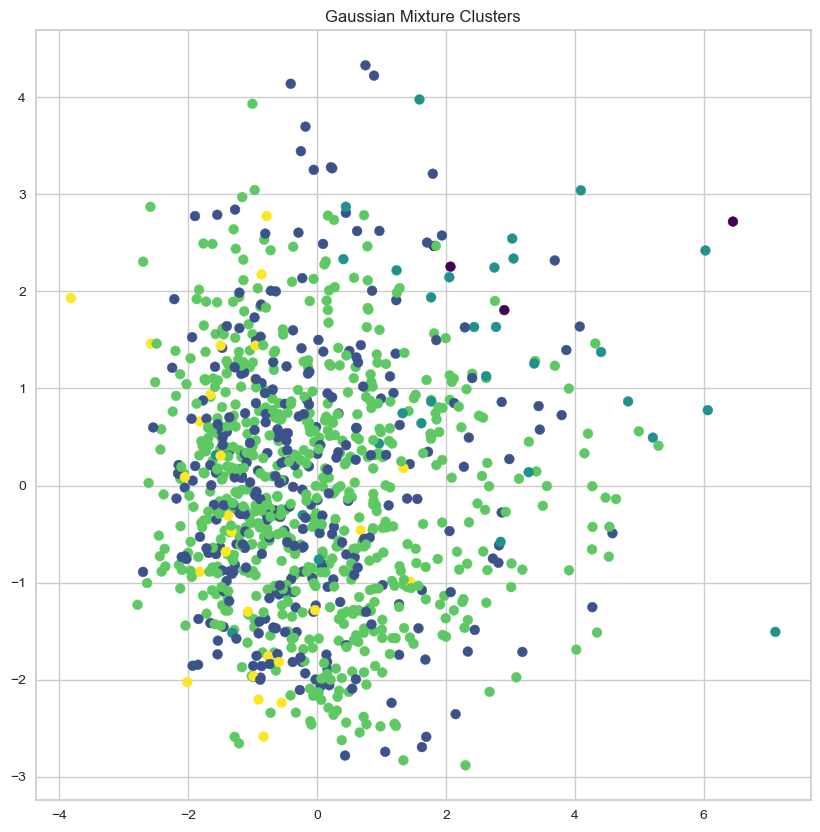

In [21]:
#Plotting the clusters and its centroids
plt.figure(figsize=(10, 10))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=gmm.predict(X_prep), s=50, cmap='viridis')
plt.title('Gaussian Mixture Clusters')
plt.show()

In [22]:
#Creating a function to search for a song in the dataframe and return the cluster
def get_cluster(song):
    try:
        return data[data['song'] == song]['cluster'].values[0]
    except:
        return None

In [23]:
#Testing the function
get_cluster('Anti-Hero')

2

In [24]:
import pandas as pd
import tkinter as tk
from tkinter import messagebox
from sklearn.metrics.pairwise import cosine_similarity

# Suponiendo que tienes una base de datos 'data' con columnas 'song', 'artist' y 'cluster'

# Calcular similitud entre clusters
clusters = data['cluster'].unique()
cluster_features_matrix = pd.get_dummies(data['cluster']).values



In [25]:
# Calcular similitud entre los clusters
cosine_sim = cosine_similarity(cluster_features_matrix)

In [26]:
data['song_artist'] = data['song'] + ' - ' + data['artist']

In [27]:
#Función para obtener recomendaciones basadas en clusters y filtrar por una palabra específica
def get_cluster_recommendations(song, cosine_sim=cosine_sim):
    data['song'] = data['song'].str.lower()  # Convertir nombres de canciones a minúsculas
    data['song'] = data['song'].str.replace('&', 'and')  # Reemplazar '&' por 'y'

    input_song = song.lower()  # Convertir nombre de la canción ingresada a minúsculas
    input_song = input_song.replace('&', 'and')  # Reemplazar '&' por 'y' en la canción ingresada

    song_cluster = data[data['song'] == input_song]['cluster'].values[0]
    sim_scores = list(cosine_sim[song_cluster])
    sim_scores = sorted(enumerate(sim_scores), key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Excluir la canción de entrada
    song_indices = [i[0] for i in sim_scores]

    return data['song_artist'].iloc[song_indices]

In [30]:
#Función para manejar la solicitud del usuario
def recommend_song():
    input_song = entry_song.get()
    if input_song:
        try:
            recommendations = get_cluster_recommendations(input_song)
            messagebox.showinfo("Recommendations", "\n".join(recommendations))
        except IndexError:
            messagebox.showerror("Error", "The song is not found in the database!")
    else:
        messagebox.showerror("Error", "Please enter a song title!")



In [32]:
#Configuración de la interfaz
root = tk.Tk()
root.title("Song Recommender")

label_instructions = tk.Label(root, text="Insert a song title:")
label_instructions.pack()

entry_song = tk.Entry(root, width=50)
entry_song.pack()

button_recommend = tk.Button(root, text="Get recommendations", command=recommend_song)
button_recommend.pack()

root.mainloop()